In [10]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file = 'C:/users/borna/documents/analize2.csv'

df = pd.read_csv(file).iloc[:, 1:]
#df = df.drop(df[df['result']=='Pending'].index)
df = df[df['result'].isin(['Win', 'Lose'])]

#Risk tolerance of the user
#Using clustering on the same events and comparing individuals win percentages to make the bet
#Frequency Distribution
#Frequency Dist over coefficients

In [11]:
#Calculating win percentages
win_counts = df[df['result']=='Win'].groupby('username').size()
total_counts = df.groupby('username').size()
win_percent = (win_counts/total_counts)*100

unique_usernames = df['username'].unique()
#.index & .values assures they are matching values
usernamePercent = {'username': total_counts.index, 'Win Percentages': win_percent.values, 'Total Bets': total_counts.values}
df_1 = pd.DataFrame(usernamePercent)
df_1.reset_index(drop=True, inplace=True)
df_1 = df_1.dropna(subset=['Win Percentages'])
df_1 = df_1[df_1['Total Bets'] >= 20]

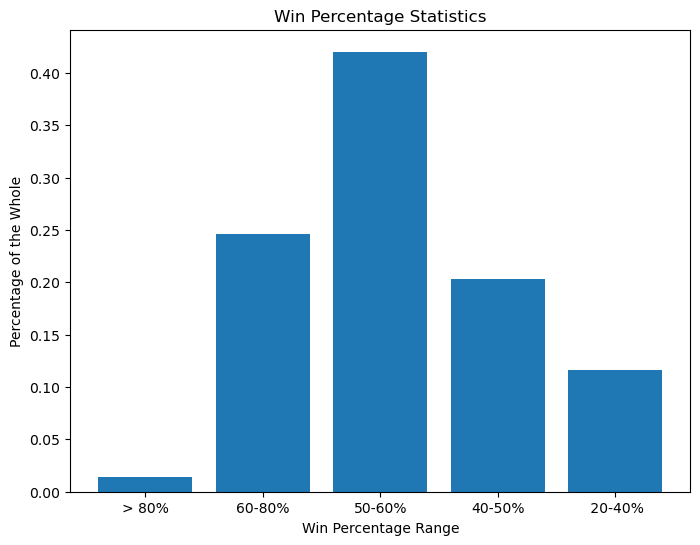

In [12]:
#Plotting win percentages using determined labels to users with >= 20 total bets
percentOfDataset = [
    (df_1['Win Percentages'] > 80).sum()/69,
    ((df_1['Win Percentages'] > 60) & (df_1['Win Percentages'] <= 80)).sum()/69,
    ((df_1['Win Percentages'] >= 50) & (df_1['Win Percentages'] <= 60)).sum()/69,
    ((df_1['Win Percentages'] > 40) & (df_1['Win Percentages'] < 50)).sum()/69,
    ((df_1['Win Percentages'] >= 20) & (df_1['Win Percentages'] <= 40)).sum()/69
]

labels = ['> 80%', '60-80%', '50-60%', '40-50%', ' 20-40%']


plt.figure(figsize=(8,6))
plt.bar(labels, percentOfDataset)
plt.title('Win Percentage Statistics')
plt.xlabel('Win Percentage Range')
plt.ylabel('Percentage of the Whole')
plt.show()

In [79]:
#Sorting users upon biggest win_percentages and >= 20 Bets

bestToWorst = df_1.sort_values(by='Win Percentages', ascending=False).head(10)
worstToBest = df_1.sort_values(by='Win Percentages').head(10)

In [80]:
worstToBest

,username,Win Percentages,Total Bets
556,Sanjooo1908,21.739130,23
853,ficcoo8,35.483871,31
412,Marko_Sapit,37.500000,24
988,lazaneo,37.500000,24
335,LaMartina,38.000000,50
946,karlo1512,38.095238,105
1089,mrki69m,39.130435,23
75,Bosancic542,40.000000,30
760,bruc0502,41.176471,51
605,TV_serviser,41.304348,46


c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

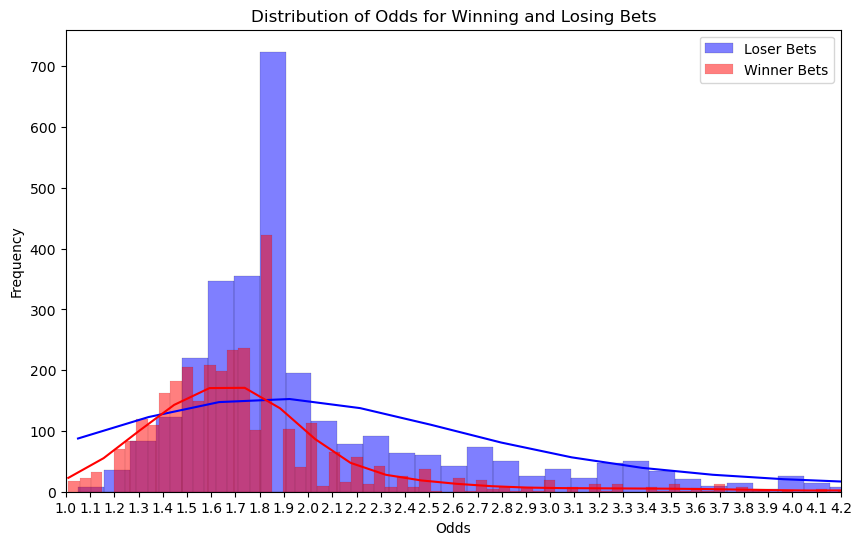

In [81]:
#Clustering by odds to create density plots for wins and loses 
loserOdds = df[df['result'] == 'Lose']['odds']
winnerOdds = df[df['result'] == 'Win']['odds']

plt.figure(figsize=(10,6))

sns.histplot(loserOdds, color='blue', kde=True, label='Loser Bets')
sns.histplot(winnerOdds, color='red', kde=True, label='Winner Bets')

plt.xlim(1, 4)
plt.xticks(np.arange(1, 4.25, step=0.1))

plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.title('Distribution of Odds for Winning and Losing Bets')
plt.legend()
plt.show()

c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

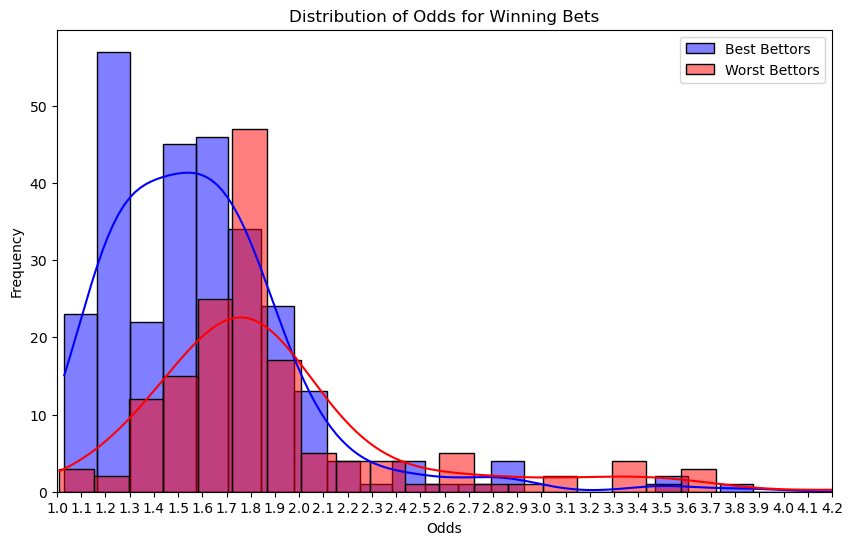

In [87]:
#The Good, the Bad and the Ugly
best_bettors = bestToWorst['username']
worst_bettors = worstToBest['username']

best_bettors_data = df[df['username'].isin(best_bettors)]
worst_bettors_data = df[df['username'].isin(worst_bettors)]

best_bettors_df = best_bettors_data[['username', 'sport', 'event', 'type', 'odds', 'result']]
worst_bettors_df = worst_bettors_data[['username', 'sport', 'event', 'type', 'odds', 'result']]

#Similarities and differences between best bettors and worst bettors in won bets
bestBettorsWin = best_bettors_data[best_bettors_data['result'] == 'Win']['odds']
worstBettorsWin = worst_bettors_data[worst_bettors_data['result'] == 'Win']['odds']

plt.figure(figsize=(10,6))

sns.histplot(bestBettorsWin, color='blue', kde=True, label='Best Bettors')
sns.histplot(worstBettorsWin, color='red', kde=True, label='Worst Bettors')

plt.xlim(1, 4)
plt.xticks(np.arange(1, 4.25, step=0.1))

plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.title('Distribution of Odds for Winning Bets')
plt.legend()
plt.show()

c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

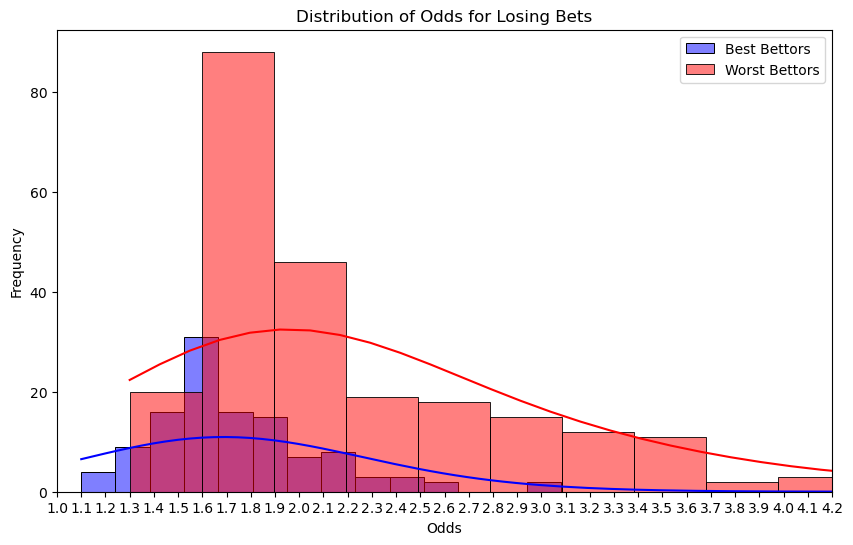

In [88]:
#Similarities and differences between best bettors and worst bettors in lost bets
bestBettorsLose = best_bettors_data[best_bettors_data['result'] == 'Lose']['odds']
worstBettorsLose = worst_bettors_data[worst_bettors_data['result'] == 'Lose']['odds']

plt.figure(figsize=(10,6))

sns.histplot(bestBettorsLose, color='blue', kde=True, label='Best Bettors')
sns.histplot(worstBettorsLose, color='red', kde=True, label='Worst Bettors')

plt.xlim(1, 4)
plt.xticks(np.arange(1, 4.25, step=0.1))

plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.title('Distribution of Odds for Losing Bets')
plt.legend()
plt.show()

In [90]:
bestBettorsMean = best_bettors_data['odds'].mean()
bestBettorsSD = best_bettors_data['odds'].std()
bestBettorsMedian = best_bettors_data['odds'].median()

worstBettorsMean = worst_bettors_data['odds'].mean()
worstBettorsSD = worst_bettors_data['odds'].std()
worstBettorsMedian = worst_bettors_data['odds'].median()

print(f"Odds mean for best bettors: {bestBettorsMean}")
print(f"Standard deviation of odds for best bettors: {bestBettorsSD}")
print(f"Median of odds for best bettors: {bestBettorsMedian}")

print(f"Odds mean for worst bettors: {worstBettorsMean}")
print(f"Standard deviation of odds for worst bettors: {worstBettorsSD}")
print(f"Median of odds for worst bettors: {worstBettorsMedian}")

Odds mean for best bettors: 1.7213366336633664
Standard deviation of odds for best bettors: 0.8359768334404879
Median of odds for best bettors: 1.6
Odds mean for worst bettors: 2.3233660933660936
Standard deviation of odds for worst bettors: 1.6471029115126712
Median of odds for worst bettors: 1.85


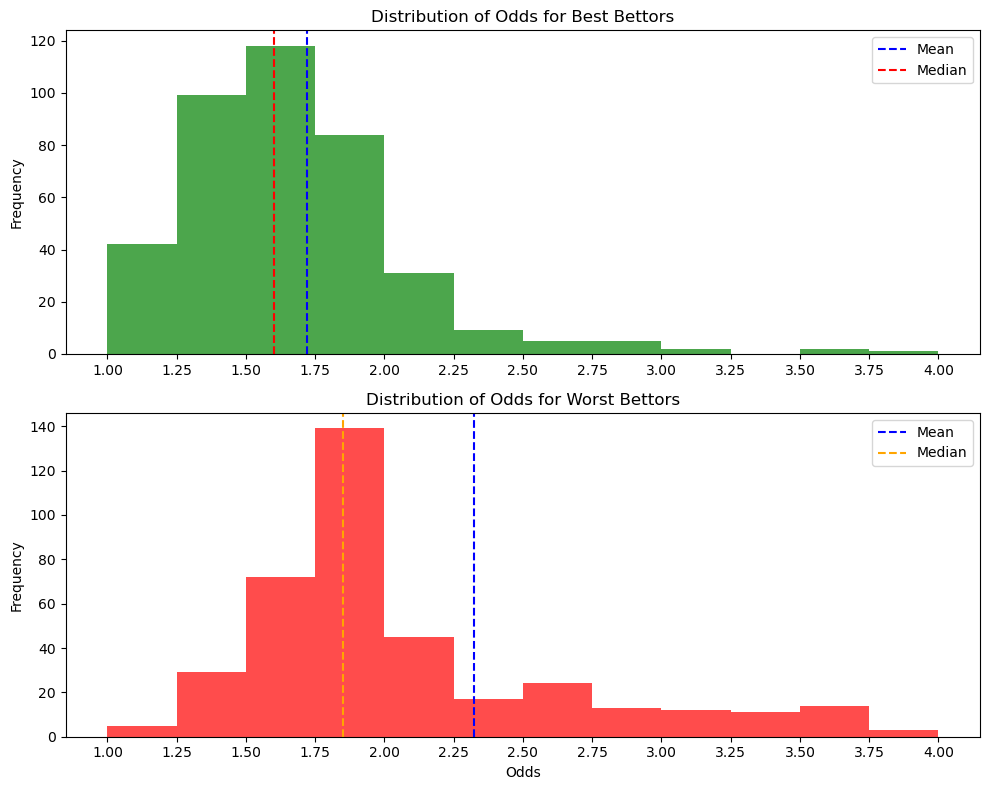

In [91]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].hist(best_bettors_data['odds'], bins=np.arange(1, 4.25, 0.25), color='green', alpha=0.7)
axs[0].set_title('Distribution of Odds for Best Bettors')
axs[0].set_ylabel('Frequency')

axs[1].hist(worst_bettors_data['odds'], bins=np.arange(1, 4.25, 0.25), color='red', alpha=0.7)
axs[1].set_title('Distribution of Odds for Worst Bettors')
axs[1].set_xlabel('Odds')
axs[1].set_ylabel('Frequency')

tick_positions = np.arange(1, 4.25, 0.25)
axs[0].set_xticks(tick_positions)
axs[1].set_xticks(tick_positions)


axs[0].axvline(bestBettorsMean, color='blue', linestyle='--', label='Mean')
axs[0].axvline(bestBettorsMedian, color='red', linestyle='--', label='Median')
axs[0].legend()

axs[1].axvline(worstBettorsMean, color='blue', linestyle='--', label='Mean')
axs[1].axvline(worstBettorsMedian, color='orange', linestyle='--', label='Median')
axs[1].legend()
plt.tight_layout()
plt.show()


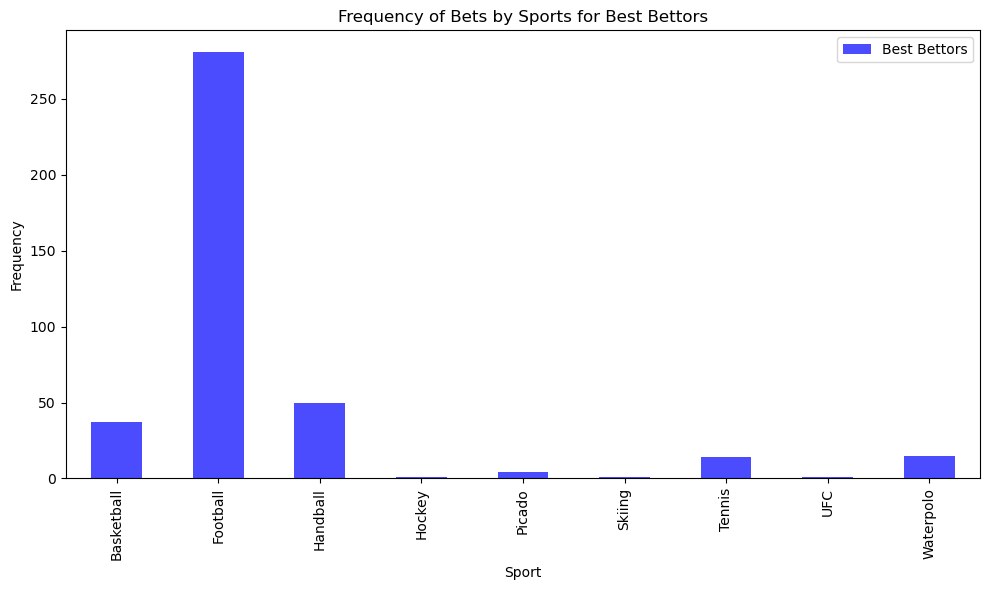

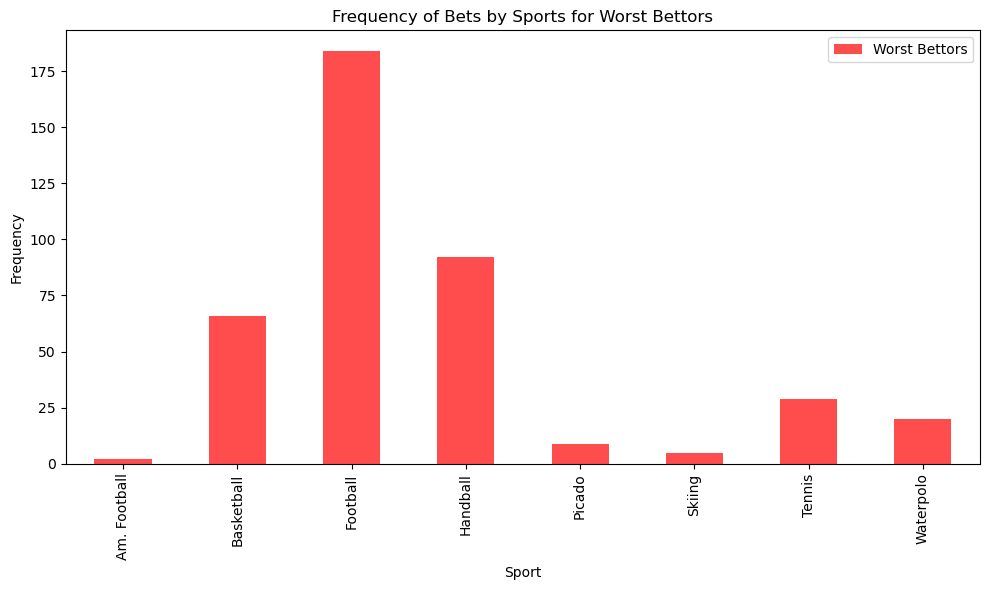

(sport
 Basketball     37
 Football      281
 Handball       50
 Hockey          1
 Picado          4
 Skiing          1
 Tennis         14
 UFC             1
 Waterpolo      15
 dtype: int64,
 sport
 Am. Football      2
 Basketball       66
 Football        184
 Handball         92
 Picado            9
 Skiing            5
 Tennis           29
 Waterpolo        20
 dtype: int64)

In [94]:
#Grouping bettors by sports 
bestBettorsSports = best_bettors_df.groupby('sport')
bestBettorsSportsCount = bestBettorsSports.size()

worstBettorsSports = worst_bettors_df.groupby('sport')
worstBettorsSportsCount = worstBettorsSports.size()

plt.figure(figsize=(10,6))
bestBettorsSportsCount.plot(kind='bar', color='blue', alpha=0.7, label='Best Bettors')
plt.xlabel('Sport')
plt.ylabel('Frequency')
plt.title('Frequency of Bets by Sports for Best Bettors')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
worstBettorsSportsCount.plot(kind='bar', color='Red', alpha=0.7, label='Worst Bettors')
plt.xlabel('Sport')
plt.ylabel('Frequency')
plt.title('Frequency of Bets by Sports for Worst Bettors')
plt.legend()
plt.tight_layout()
plt.show()

#bestBettorsSportsCount.sum(), worstBettorsSportsCount.sum()
bestBettorsSportsCount, worstBettorsSportsCount
